In [1]:
# Import libraries


# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# algorithms for the two models being used for this homework
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('BDOShoham.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
# Table that summarizes the dataset statistics for BDOShoham for question 1

print('Summary of the dataset')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [4]:
# Will break FlowPattern into y and Vsl, Vsg, and Ang into X to be used for our training and cross-validation models
print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Summary of Vsl, Vsg, Ang

Box plots:


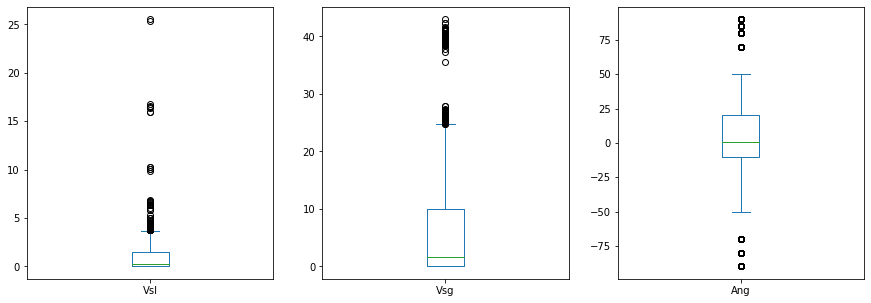

In [5]:
# Graphical Summaries on Vsl, Vsg, and Ang used to answer the graphical part of question 1.

print('Summary of Vsl, Vsg, Ang')
print()

print('Box plots:')
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

In [6]:
#Will split out the test dataset to be used 
print('Partitioning data into two parts: train (for formative development) and test (for summative evaluation) ...')
test_size = 0.20   # means 20 percent
seed = 27 # setting the seed, 27 my favorite roulette number

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
print('done \n')

Partitioning data into two parts: train (for formative development) and test (for summative evaluation) ...
done 



/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 ++++ Detailed classification report for the selected model ++++ 
Algorithm LogisticRegression(multi_class='multinomial') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


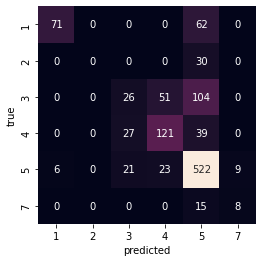

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta


 clasification report:
               precision    recall  f1-score   support

           1       0.92      0.53      0.68       133
           2       0.00      0.00      0.00        30
           3       0.35      0.14      0.20       181
           4       0.62      0.65      0.63       187
           5       0.68      0.90      0.77       581
           7       0.47      0.35      0.40        23

    accuracy                           0.66      1135
   macro avg       0.51      0.43      0.45      1135
weighted avg       0.62      0.66      0.62      1135



done 

 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier() 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


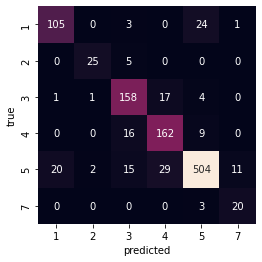


 clasification report:
               precision    recall  f1-score   support

           1       0.83      0.79      0.81       133
           2       0.89      0.83      0.86        30
           3       0.80      0.87      0.84       181
           4       0.78      0.87      0.82       187
           5       0.93      0.87      0.90       581
           7       0.62      0.87      0.73        23

    accuracy                           0.86      1135
   macro avg       0.81      0.85      0.83      1135
weighted avg       0.86      0.86      0.86      1135



done 



In [9]:
# Choosing the Algorithms
#The two models will be k-NN and Logistic regression

#logistic Regression
model1 = LogisticRegression(multi_class='multinomial',  solver='lbfgs')
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % model1)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")

predictions = model1.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()

print('\n clasification report:\n', classification_report(y_test, predictions))
print('\n')        
print('done \n')
#k-NN
model2 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % model2)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")

predictions = model2.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()

print('\n clasification report:\n', classification_report(y_test, predictions))
print('\n')        
print('done \n')

In [10]:
#Will take the two models that have been chosen to be tested, logisitc regression and k-NN, and put them into a list to be used later.
print('Reading list of algorithms to train ...')
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial',  solver='lbfgs')))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform')))
print('done \n')

Reading list of algorithms to train ...
done 



In [11]:
# The scoring method that would be used to compare the two models in cross-validation

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [12]:
# Now it is time to develop (train and validate) the models on the formative data set there will be two models, the logistic regression model and the k-NN model

k4folds = 5   # This will split our formative dataset into five parts;
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   # fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n') 

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

algorithm LR accuracy results: mean = 0.655727 (std = 0.006666)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN accuracy results: mean = 0.837225 (std = 0.009225)
done 



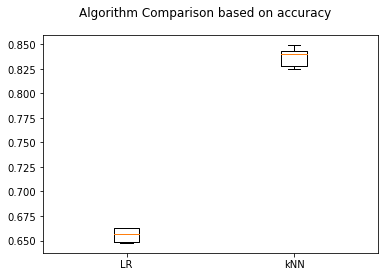

In [13]:
#Graphical comparison to see the difference in accuracy between the k-NN model and the logisitc regression model. The k-NN model did complete wipe the floor with the logistic regression.
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

In [14]:
# The Selected model was the k-NN model as it was more accurate
selected_model = KNeighborsClassifier()
parameters = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10], 'weights':['uniform','distance']}
clf = GridSearchCV(selected_model, parameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

print("Best parameters set found on development (formative) data set:")
print(clf.best_params_)
print("Grid scores on development (formative) data set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

# Report the independent final verdict using the summative data set
print("Detailed classification report:")
print("The model was trained and tuned using cross-validation on the full development (formative) data set.")
print("The reported summative evaluation scores were computed on a separate test data set.")
print('\n')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Best parameters set found on development (formative) data set:
{'n_neighbors': 3, 'weights': 'distance'}
Grid scores on development (formative) data set:
0.848 (+/-0.012) for {'n_neighbors': 3, 'weights': 'uniform'}
0.857 (+/-0.010) for {'n_neighbors': 3, 'weights': 'distance'}
0.833 (+/-0.011) for {'n_neighbors': 4, 'weights': 'uniform'}
0.853 (+/-0.003) for {'n_neighbors': 4, 'weights': 'distance'}
0.838 (+/-0.013) for {'n_neighbors': 5, 'weights': 'uniform'}
0.853 (+/-0.005) for {'n_neighbors': 5, 'weights': 'distance'}
0.828 (+/-0.017) for {'n_neighbors': 6, 'weights': 'uniform'}
0.850 (+/-0.009) for {'n_neighbors': 6, 'weights': 'distance'}
0.827 (+/-0.007) for {'n_neighbors': 7, 'weights': 'uniform'}
0.850 (+/-0.010) for {'n_neighbors': 7, 'weights': 'distance'}
0.820 (+/-0.016) for {'n_neighbors': 8, 'weights': 'uniform'}
0.849 (+/-0.010) for {'n_neighbors': 8, 'weights': 'distance'}
0.816 (+/-0.009) for {'n_neighbors': 9, 'weights': 'uniform'}
0.846 (+/-0.010) for {'n_neighbors

 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier(n_neighbors=3, weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


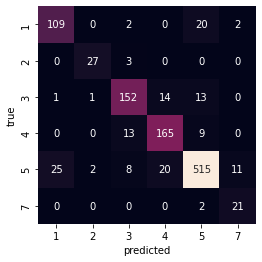


 clasification report:
               precision    recall  f1-score   support

           1       0.81      0.82      0.81       133
           2       0.90      0.90      0.90        30
           3       0.85      0.84      0.85       181
           4       0.83      0.88      0.85       187
           5       0.92      0.89      0.90       581
           7       0.62      0.91      0.74        23

    accuracy                           0.87      1135
   macro avg       0.82      0.87      0.84      1135
weighted avg       0.88      0.87      0.87      1135



done 



In [15]:
model2 = KNeighborsClassifier(n_neighbors=3, weights='distance')
model2.fit(X_train, y_train)

#Final training for the k-NN model with result from the previous cell
predictions = model2.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % model2)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = model2.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('\n')        
print('done \n')